In [18]:
import math as m

r1 = 3.14  # radius of the big part of bellow
r2 = 1.58  # radius of the small part of the bellow
t = 2.5  # skin thickness
f = 3.12 # flat part connecting two convolution. Already adjusted in the modified single module
B = 8 # diameter of the small hole within the actuator
D0 = 2*(r1 + r2 + t) # distance between two bellow
n = 5
l0 = 80 # initial length of each actuator
E = 2.88  # Young modulus of Smooth-sil 960 (MPa)
I = m.pi * t ** 3 * (2*r1 + 2*r2)/24  # Inertial Moment 

# Stiffness calculation

beta1 = (6*m.pi*r1**3 + 24*f*r1**3 + f**3 + 3*f**2*r1*m.pi*(1+t**2/(12*r1**2)))/(24 * E * I)
beta2 = (6*m.pi*r2**3 + 24*f*r2**3 + f**3 + 3*f**2*r2*m.pi*(1+t**2/(12*r2**2)))/(24 * E * I)
k = 1/(2*n*(beta1 + beta2))
k

0.035020876296148466

In [ ]:
import csv
import os
import pandas as pd
import numpy as np

parent_path = os.getcwd()
data_path = parent_path + f"\data\elongation"
filename = "log_elongation_20251225_102631"
sensor_file = data_path + f"\{filename}.csv"
line = []

# Read
df = pd.read_csv(sensor_file)

tol = 1e-12
mask_drop = (df["flow_Lmin"].abs() <= tol) & (df["press_MPa"].abs() <= tol)
df = df.loc[~mask_drop].reset_index(drop=True)

col = {name: df[name].to_numpy() for name in df.columns}

t_ms = col["t_ms"]                 # numpy array
flow_Lmin = col["flow_Lmin"]       # numpy array
press_MPa = col["press_MPa"]       # numpy array

print("Remaining rows:", len(df))
print("Columns:", list(df.columns))



Remaining rows: 3055
Columns: ['current_time', 't_ms', 'raw_flow', 'flow_Lmin', 'raw_press', 'press_MPa', 'pwm1_cur', 'pwm2_cur', 'pwm3_cur']


In [13]:
import csv
import pandas as pd

parent_path = os.getcwd()
data_path = parent_path + f"\data\elongation"
filename_log_optitrack = "log_optitrack_20251225_102631"
optitrack_file = data_path + f"\{filename_log_optitrack}.csv"

# 1) Read Capture Start Time from the metadata first row
with open(optitrack_file, "r", newline="", encoding="utf-8", errors="replace") as f:
    meta = next(csv.reader(f))

i = meta.index("Capture Start Time")
capture_start_str = meta[i + 1]
capture_start_time = pd.to_datetime(
    capture_start_str,
    format="%Y-%m-%d %I.%M.%S.%f %p"
)


skip = lambda row_idx: row_idx in (0, 1, 4)

df = pd.read_csv(optitrack_file, skiprows=skip, header=[0, 1, 2, 3])

# 3) Locate the Time (Seconds) and Frame columns
frame_col = [c for c in df.columns if c[-1] == "Frame"][0]
time_col  = [c for c in df.columns if c[-1] == "Time (Seconds)"][0]

# 4) Extract only: Type="Rigid Body", Name="RigidBody", and Rotation/Position X,Y,Z
rot_x_col = ("Rigid Body", "RigidBody", "Rotation", "X")
rot_y_col = ("Rigid Body", "RigidBody", "Rotation", "Y")
rot_z_col = ("Rigid Body", "RigidBody", "Rotation", "Z")
pos_x_col = ("Rigid Body", "RigidBody", "Position", "X")
pos_y_col = ("Rigid Body", "RigidBody", "Position", "Y")
pos_z_col = ("Rigid Body", "RigidBody", "Position", "Z")

# 5) Build a clean dataframe and compute real time
out = pd.DataFrame({
    "frame": pd.to_numeric(df[frame_col], errors="coerce"),
    "time_seconds": pd.to_numeric(df[time_col], errors="coerce"),
    "rot_x": pd.to_numeric(df[rot_x_col], errors="coerce"),
    "rot_y": pd.to_numeric(df[rot_y_col], errors="coerce"),
    "rot_z": pd.to_numeric(df[rot_z_col], errors="coerce"),
    "pos_x": pd.to_numeric(df[pos_x_col], errors="coerce"),
    "pos_y": pd.to_numeric(df[pos_y_col], errors="coerce"),
    "pos_z": pd.to_numeric(df[pos_z_col], errors="coerce"),
})

out["real_time"] = capture_start_time + pd.to_timedelta(out["time_seconds"], unit="s")

# 6) Save each column to variables (numpy arrays)
frame = out["frame"].to_numpy()
time_seconds = out["time_seconds"].to_numpy()
real_time = out["real_time"].to_numpy()

rot_x = out["rot_x"].to_numpy()
rot_y = out["rot_y"].to_numpy()
rot_z = out["rot_z"].to_numpy()

pos_x = out["pos_x"].to_numpy()
pos_y = out["pos_y"].to_numpy()
pos_z = out["pos_z"].to_numpy()

print("Capture Start Time:", capture_start_time)
print("Rows:", len(out))
print(out.head())


Capture Start Time: 2025-12-25 10:27:09.123000
Rows: 29304
   frame  time_seconds      rot_x     rot_y      rot_z      pos_x       pos_y  \
0      0      0.000000 -18.428200 -1.879516  15.938037  20.748026  226.977798   
1      1      0.008333 -18.441271 -1.849935  15.836992  20.599529  227.008240   
2      2      0.016667 -18.509520 -1.823339  15.768102  20.446413  227.025009   
3      3      0.016667 -18.509520 -1.823339  15.768102  20.446413  227.025009   
4      4      0.033333 -19.012535 -1.910363  15.816867  19.960293  227.143936   

        pos_z                  real_time  
0  266.616241 2025-12-25 10:27:09.123000  
1  266.638885 2025-12-25 10:27:09.131333  
2  266.663330 2025-12-25 10:27:09.139667  
3  266.663330 2025-12-25 10:27:09.139667  
4  267.191986 2025-12-25 10:27:09.156333  


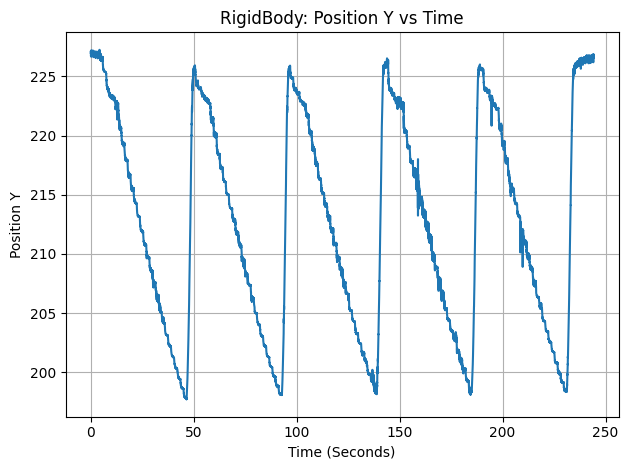

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

t = out["time_seconds"]
pos_y = out["pos_y"]

# Drop rows with NaNs (common in OptiTrack exports)
mask = t.notna() & pos_y.notna()
t = t[mask]
pos_y = pos_y[mask]

plt.figure()
plt.plot(t, pos_y)
plt.xlabel("Time (Seconds)")
plt.ylabel("Position Y")
plt.title("RigidBody: Position Y vs Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: save the figure
# plt.savefig("posY_vs_time.png", dpi=200)


In [2]:
import pandas as pd


def read_elongation_log(
    path: str,
    start_t_ms: int | None = None,          # e.g., 50 to trim from t_ms==50
    drop_zero_flow_press: bool = False,     # True to drop rows where both are 0
    eps: float = 1e-12,
):
    # 1) Read CSV
    df = pd.read_csv(path)

    # 2) Convert columns to numeric where appropriate
    numeric_cols = [
        "t_ms", "raw_flow", "flow_Lmin", "raw_press", "press_MPa",
        "pwm1_cur", "pwm2_cur", "pwm3_cur",
    ]
    for c in numeric_cols:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")


    # 3) Optional: trim from the first row where t_ms == start_t_ms
    if start_t_ms is not None:
        hits = df.index[df["t_ms"] == start_t_ms].to_list()
        if not hits:
            raise ValueError(f"t_ms == {start_t_ms} not found in the file.")
        df = df.loc[hits[0]:].reset_index(drop=True)

    # 4) Optional: drop rows where BOTH flow_Lmin and press_MPa are ~0
    if drop_zero_flow_press:
        mask_drop = (df["flow_Lmin"].abs() <= eps) & (df["press_MPa"].abs() <= eps)
        df = df.loc[~mask_drop].reset_index(drop=True)

    # 5) Save each column to variables (NumPy arrays) via a dict
    cols = {name: df[name].to_numpy() for name in df.columns}

    return df, cols


if __name__ == "__main__":
    import os
    parent_path = os.getcwd()
    data_path = parent_path + f"\data\elongation"
    filename_log_sensor = "log_elongation_20251225_102631"
    sensor_file = data_path + f"\{filename_log_sensor}.csv"

    df, col = read_elongation_log(
        sensor_file,
        start_t_ms=None,            # set to 50 if you want trimming
        drop_zero_flow_press=False  # set True if you want filtering
    )

    # Example: pull columns as variables
    t_ms = col["t_ms"]
    flow_Lmin = col["flow_Lmin"]
    press_MPa = col["press_MPa"]

    print(df.head())
    print("Rows:", len(df))


  current_time  t_ms  raw_flow  flow_Lmin  raw_press  press_MPa  pwm1_cur  \
0     10:26:32    50       210      0.557        161     0.0000       154   
1     10:26:32   100       158      0.000        152     0.0000       154   
2     10:26:32   150       161      0.000        159     0.0000       154   
3     10:26:32   200       207      0.192        209     0.0044       154   
4     10:26:32   250       159      0.000        155     0.0000       154   

   pwm2_cur  pwm3_cur  
0       156       155  
1       156       155  
2       156       155  
3       156       155  
4       156       155  
Rows: 5432


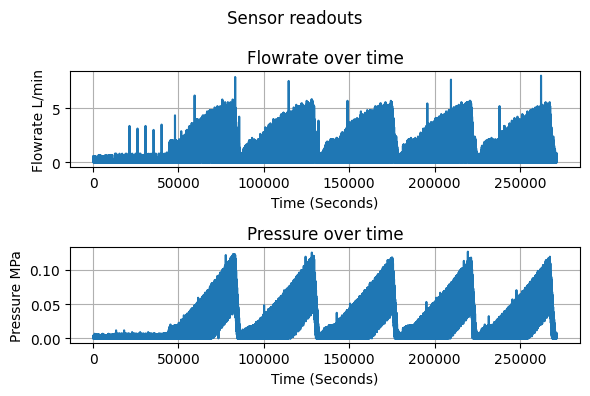

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

fig,axs = plt.subplots(nrows=2,ncols=1, figsize = (6,4))

axs[0].plot(t_ms, flow_Lmin)
axs[0].set_xlabel("Time (Seconds)")
axs[0].set_ylabel("Flowrate L/min")
axs[0].set_title("Flowrate over time")
axs[0].grid(True)

axs[1].plot(t_ms, press_MPa)
axs[1].set_xlabel("Time (Seconds)")
axs[1].set_ylabel("Pressure MPa")
axs[1].set_title("Pressure over time")
axs[1].grid(True)

plt.suptitle('Sensor readouts')
plt.tight_layout()
plt.show()

In [7]:
import csv
import pandas as pd
import os

parent_path = os.getcwd()
data_path = parent_path + f"\data\elongation"
filename_log_optitrack = "log_elongation_optitrack_20260127_172907"
filename_log_sensor = "log_elongation_20260127_172907"
optitrack_file = data_path + f"\{filename_log_optitrack}.csv"
sensor_file = data_path + f"\{filename_log_sensor}.csv"
ELONG_PATH = sensor_file
OPTI_PATH  = optitrack_file
ACT_PATH   = data_path + f"\{filename_log_sensor}_timestamp_1.csv"


def read_optitrack_rigidbody(path: str, rigid_name: str = "RigidBody") -> tuple[pd.Timestamp, pd.DataFrame]:
    # Read Capture Start Time from the metadata row (row 0)
    with open(path, "r", newline="", encoding="utf-8", errors="replace") as f:
        meta = next(csv.reader(f))

    i = meta.index("Capture Start Time")
    capture_start_str = meta[i + 1]
    capture_start_time = pd.to_datetime(
        capture_start_str,
        format="%Y-%m-%d %I.%M.%S.%f %p",
        errors="raise",
    )

    # Read main OptiTrack table (multi-row header)
    skip = lambda row_idx: row_idx in (0, 1, 4)  # metadata row, blank row, ID row
    df = pd.read_csv(path, skiprows=skip, header=[0, 1, 2, 3])

    time_col = [c for c in df.columns if c[-1] == "Time (Seconds)"][0]
    frame_col = [c for c in df.columns if c[-1] == "Frame"][0]

    # Required RigidBody fields
    pos_x_col = ("Rigid Body", rigid_name, "Position", "X")
    pos_y_col = ("Rigid Body", rigid_name, "Position", "Y")
    pos_z_col = ("Rigid Body", rigid_name, "Position", "Z")
    rot_x_col = ("Rigid Body", rigid_name, "Rotation", "X")
    rot_y_col = ("Rigid Body", rigid_name, "Rotation", "Y")
    rot_z_col = ("Rigid Body", rigid_name, "Rotation", "Z")

    out = pd.DataFrame({
        "opti_frame": pd.to_numeric(df[frame_col], errors="coerce"),
        "opti_time_s": pd.to_numeric(df[time_col], errors="coerce"),
        "rot_x": pd.to_numeric(df[rot_x_col], errors="coerce"),
        "rot_y": pd.to_numeric(df[rot_y_col], errors="coerce"),
        "rot_z": pd.to_numeric(df[rot_z_col], errors="coerce"),
        "pos_x": pd.to_numeric(df[pos_x_col], errors="coerce"),
        "pos_y": pd.to_numeric(df[pos_y_col], errors="coerce"),
        "pos_z": pd.to_numeric(df[pos_z_col], errors="coerce"),
    }).dropna(subset=["opti_time_s"])

    out["opti_timestamp"] = capture_start_time + pd.to_timedelta(out["opti_time_s"], unit="s")
    out = out.sort_values("opti_timestamp").reset_index(drop=True)

    return capture_start_time, out


def read_elongation_with_timestamp(
    path: str,
    capture_start_time: pd.Timestamp,
    reset_jump_ms: float = 1000.0,   # threshold to detect t_ms reset
) -> pd.DataFrame:
    df = pd.read_csv(path)

    needed = ["current_time", "t_ms", "flow_Lmin", "raw_press", "press_MPa"]
    missing = [c for c in needed if c not in df.columns]
    if missing:
        raise ValueError(f"Elongation file missing columns: {missing}. Columns: {list(df.columns)}")

    df = df[needed].copy()

    # numeric
    df["t_ms"] = pd.to_numeric(df["t_ms"], errors="coerce")
    df["flow_Lmin"] = pd.to_numeric(df["flow_Lmin"], errors="coerce")
    df["raw_press"] = pd.to_numeric(df["raw_press"], errors="coerce")
    df["press_MPa"] = pd.to_numeric(df["press_MPa"], errors="coerce")

    # current_time -> timedelta since midnight
    df["ct_td"] = pd.to_timedelta(df["current_time"], errors="coerce")

    df = df.dropna(subset=["t_ms", "ct_td"]).reset_index(drop=True)

    # 1) Trim after the last reset in t_ms (large negative diff)
    resets = df.index[df["t_ms"].diff() < -reset_jump_ms].tolist()
    if resets:
        df = df.loc[resets[-1]:].reset_index(drop=True)

    # 2) Build a high resolution timestamp:
    #    base second from current_time + within second ms from t_ms
    capture_date = pd.Timestamp(capture_start_time.date())
    df["ct_sec"] = capture_date + df["ct_td"]

    tmin_in_sec = df.groupby("ct_sec")["t_ms"].transform("min")
    df["ts_est"] = df["ct_sec"] + pd.to_timedelta(df["t_ms"] - tmin_in_sec, unit="ms")

    # 3) Align elongation timestamps to OptiTrack start by a small offset
    idx_closest = (df["ts_est"] - capture_start_time).abs().idxmin()
    offset = capture_start_time - df.loc[idx_closest, "ts_est"]

    df["elong_timestamp"] = df["ts_est"] + offset
    df = df.sort_values("elong_timestamp").reset_index(drop=True)

    return df


def read_actions(path: str, capture_start_time: pd.Timestamp) -> pd.DataFrame:
    """
    Action file: collection of timestamps (current_time) when pwm_incr occurs.
    We assume each row is one action event.
    """
    act = pd.read_csv(path)

    if "current_time" not in act.columns:
        raise ValueError(f"Action file must contain 'current_time'. Columns: {list(act.columns)}")

    # If file has pwm_incr column and you want to filter only rows where it indicates an event,
    # uncomment and adjust as needed:
    # if "pwm_incr" in act.columns:
    #     act = act[act["pwm_incr"].notna()].copy()

    td = pd.to_timedelta(act["current_time"], errors="coerce")
    capture_date = pd.Timestamp(capture_start_time.date())
    act["action_timestamp"] = capture_date + td

    act = act.dropna(subset=["action_timestamp"]).sort_values("action_timestamp").reset_index(drop=True)
    return act


def build_matched_dataframe_fixed_duration(
    opt: pd.DataFrame,
    elong: pd.DataFrame,
    actions: pd.DataFrame,
    action_duration_s: float = 1.5,
    tolerance: str = "80ms",            # relax tolerance to avoid dropping frames
    keep_unmatched_elong: bool = True,  # do not drop OptiTrack frames if elongation missing
) -> pd.DataFrame:

    opt = opt.sort_values("opti_timestamp").reset_index(drop=True)
    elong = elong.sort_values("elong_timestamp").reset_index(drop=True)
    actions = actions.sort_values("action_timestamp").reset_index(drop=True).copy()

    actions["segment_id"] = range(len(actions))
    if "pwm_incr" not in actions.columns:
        actions["pwm_incr"] = actions["segment_id"] + 1

    # Corrected schedule: start times spaced by exactly 1.5 s from the first action
    t0_action = actions.loc[0, "action_timestamp"]
    actions["action_start_corr"] = t0_action + pd.to_timedelta(actions["segment_id"] * action_duration_s, unit="s")

    # Label each OptiTrack frame by the most recent corrected action start
    opt_labeled = pd.merge_asof(
        opt,
        actions[["action_start_corr", "segment_id", "pwm_incr"]],
        left_on="opti_timestamp",
        right_on="action_start_corr",
        direction="backward",
    ).dropna(subset=["action_start_corr"]).copy()

    # Keep frames inside the 1.5 s window
    opt_labeled["segment_time_s"] = (opt_labeled["opti_timestamp"] - opt_labeled["action_start_corr"]).dt.total_seconds()
    opt_labeled = opt_labeled[
        (opt_labeled["segment_time_s"] >= 0.0) & (opt_labeled["segment_time_s"] < action_duration_s)
    ].copy()

    if opt_labeled.empty:
        raise ValueError("No OptiTrack frames fall inside corrected 1.5s windows. Check time overlap.")

    # Match each OptiTrack frame to nearest elongation
    merged = pd.merge_asof(
        opt_labeled.sort_values("opti_timestamp"),
        elong,
        left_on="opti_timestamp",
        right_on="elong_timestamp",
        direction="nearest",
        tolerance=pd.Timedelta(tolerance),
    )

    if not keep_unmatched_elong:
        merged = merged.dropna(subset=["elong_timestamp"]).copy()

    # Time axis from the beginning (first corrected action start)
    merged["time_s"] = (merged["opti_timestamp"] - actions.loc[0, "action_start_corr"]).dt.total_seconds()

    final = merged[[
        "time_s",
        "pwm_incr",
        "segment_id",
        "segment_time_s",
        "rot_x", "rot_y", "rot_z",
        "pos_x", "pos_y", "pos_z",
        "flow_Lmin", "raw_press", "press_MPa",
    ]].sort_values("time_s").reset_index(drop=True)

    return final


if __name__ == "__main__":
    capture_start_time, opt = read_optitrack_rigidbody(OPTI_PATH, rigid_name="RigidBody")
    # print(opt[:5])
    elong = read_elongation_with_timestamp(ELONG_PATH, capture_start_time)
    # print(elong[:5])
    actions = read_actions(ACT_PATH, capture_start_time)
    # print(actions[:5])
    df_final = build_matched_dataframe_fixed_duration(
        opt=opt,
        action_duration_s = 1.5,
        elong=elong,
        actions=actions,
        tolerance="80ms",   # adjust if you want, e.g. "60ms"
    )

    print("Capture Start Time:", capture_start_time)
    print("Action events:", len(actions))
    print("Final rows:", len(df_final))
    print(df_final.head())
    print("OptiTrack time range:", opt["opti_timestamp"].min(), "to", opt["opti_timestamp"].max())
    print("Elong time range:", elong["elong_timestamp"].min(), "to", elong["elong_timestamp"].max())
    print("Action time range:", actions["action_timestamp"].min(), "to", actions["action_timestamp"].max())

    # Optional: save
    # df_final.to_csv("/mnt/data/matched_optitrack_elongation_by_actions.csv", index=False)


Capture Start Time: 2026-01-27 17:29:09.800000
Action events: 20
Final rows: 3600
     time_s  pwm_incr  segment_id  segment_time_s       rot_x      rot_y  \
0  0.000000       1.0         0.0        0.000000 -130.594894 -40.737576   
1  0.008333       1.0         0.0        0.008333 -130.551163 -40.746471   
2  0.016667       1.0         0.0        0.016667 -130.600784 -40.744816   
3  0.025000       1.0         0.0        0.025000 -130.595474 -40.738209   
4  0.033333       1.0         0.0        0.033333 -130.577255 -40.751160   

        rot_z      pos_x       pos_y       pos_z  flow_Lmin  raw_press  \
0 -139.554062  26.407963  283.760193  207.409882       0.07        215   
1 -139.346985  26.431614  283.826508  207.571503       0.07        215   
2 -139.556961  26.414536  283.769012  207.403336       0.07        215   
3 -139.555267  26.409077  283.761597  207.411865       0.07        215   
4 -139.363113  26.432974  283.836426  207.578323       0.00        211   

   press_MPa  
0

In [ ]:
import numpy as np
import pandas as pd

def clean_dropouts_piecewise_minvalid(
    s: pd.Series,
    base_min_valid: float = 1e-6,
    late_min_valid: float = 0.02,
    start_ratio: float = 0.5,
    max_gap: int = 25,
    smooth_med_win: int = 11,
    smooth_ema_alpha: float = 0.12,
):
    """
    Piecewise dropout removal:
      - First part: treat abs(x) <= base_min_valid as dropout
      - Later part (from start_ratio): treat abs(x) <= late_min_valid as dropout

    Then interpolate short gaps and smooth.
    """
    x = s.astype(float).copy()
    n = len(x)
    start_idx = int(n * start_ratio)

    # Build piecewise threshold
    thr = np.full(n, base_min_valid, dtype=float)
    thr[start_idx:] = late_min_valid

    # Mark near-zero values as NaN using piecewise threshold
    mask = x.abs().to_numpy() <= thr
    x[mask] = np.nan

    # Interpolate short gaps only
    x = x.interpolate(method="linear", limit=max_gap, limit_direction="both")

    # Smooth: rolling median then EMA
    x = x.rolling(window=smooth_med_win, center=True, min_periods=1).median()
    x = x.ewm(alpha=smooth_ema_alpha, adjust=False).mean()

    return x


def linear_fit(t: np.ndarray, y: np.ndarray):
    mask = np.isfinite(t) & np.isfinite(y)
    a, b = np.polyfit(t[mask], y[mask], 1)  # y = a*t + b
    return a, b

df = df_final.copy()

# Pressure: end has dropouts to near 0, so use higher late_min_valid (MPa)
df["press_clean"] = clean_dropouts_piecewise_minvalid(
    df["press_MPa"],
    base_min_valid=1e-5,
    late_min_valid=0.04,   # increase this if drops still remain (e.g., 0.03)
    start_ratio=0.3,
    max_gap=40,
    smooth_med_win=11,
    smooth_ema_alpha=0.12,
)


# Flow: tune late_min_valid in L/min (choose based on your data scale)
df["flow_clean"] = clean_dropouts_piecewise_minvalid(
    df["flow_Lmin"],
    base_min_valid=1e-5,
    late_min_valid=2.5,    # example; set based on typical flow magnitude
    start_ratio=0.4,
    max_gap=40,
    smooth_med_win=11,
    smooth_ema_alpha=0.12,
)


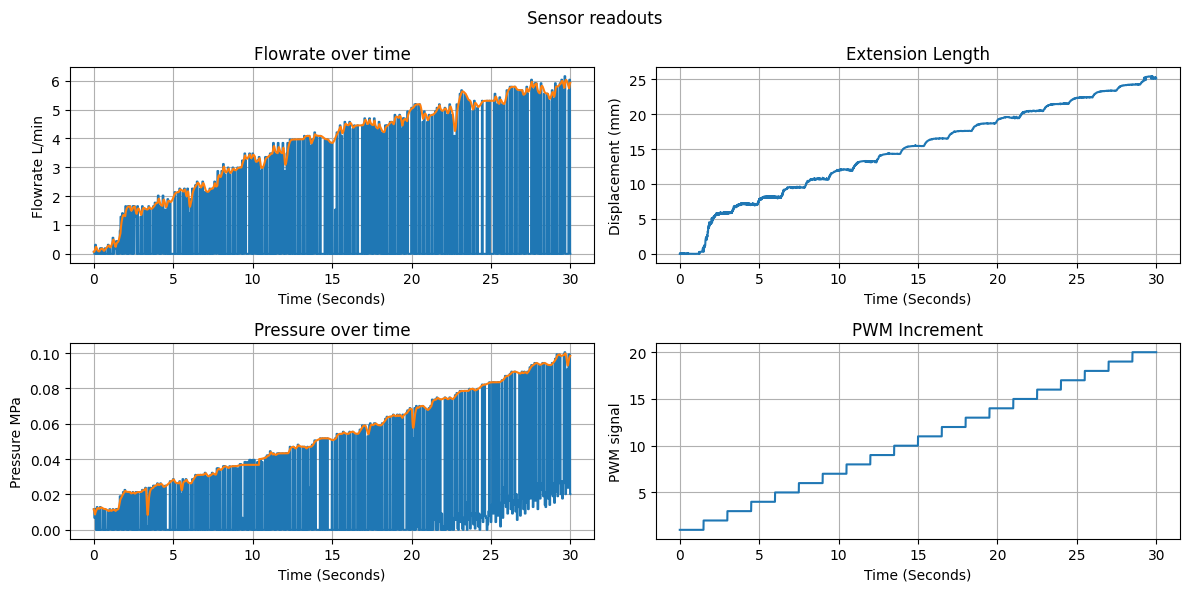

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
time = df_final['time_s']
press_clean = df['press_clean']
flow_clean = df['flow_clean']
press = df_final['press_MPa']
flow = df_final['flow_Lmin']
disp = abs(df_final['pos_y'] - df_final['pos_y'][0])
act = np.linspace(0,20,len(press_clean))
pwm = df_final['pwm_incr']
fig,axs = plt.subplots(nrows=2,ncols=2, figsize = (12,6))

axs[0][0].plot(time, flow)
axs[0][0].plot(time, flow_clean)
axs[0][0].set_xlabel("Time (Seconds)")
axs[0][0].set_ylabel("Flowrate L/min")
axs[0][0].set_title("Flowrate over time")
axs[0][0].grid(True)

axs[1][0].plot(time, press)
axs[1][0].plot(time, press_clean)
axs[1][0].set_xlabel("Time (Seconds)")
axs[1][0].set_ylabel("Pressure MPa")
axs[1][0].set_title("Pressure over time")
axs[1][0].grid(True)

axs[0][1].plot(time, disp)
axs[0][1].set_xlabel("Time (Seconds)")
axs[0][1].set_ylabel("Displacement (mm)")
axs[0][1].set_title("Extension Length")
axs[0][1].grid(True)

axs[1][1].plot(time, pwm)
axs[1][1].set_xlabel("Time (Seconds)")
axs[1][1].set_ylabel("PWM signal")
axs[1][1].set_title("PWM Increment")
axs[1][1].grid(True)

plt.suptitle('Sensor readouts')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.optimize import curve_fit

def model_saturating_exp(p, k0, a, b):
    return k0 + a * (1.0 - np.exp(-b * p))

def fit_saturating_exp(p, k):
    p = np.asarray(p, dtype=float).ravel()
    k = np.asarray(k, dtype=float).ravel()

    mask = np.isfinite(p) & np.isfinite(k)
    p, k = p[mask], k[mask]
    # Sort by pressure (important for sane initial guesses)
    idx = np.argsort(p)
    p, k = p[idx], k[idx]

    if p.size < 3:
        raise ValueError("Need at least 3 points to fit.")

    # Robust initial guesses
    k0_0 = float(np.min(k))                    # baseline stiffness
    a_0  = float(np.max(k) - np.min(k))        # saturation amplitude
    if a_0 <= 0:
        raise ValueError("Data has no increasing trend (max(k) <= min(k)).")

    # estimate b from ~63% rise point: k = k0 + 0.632*a occurs around p = 1/b
    target = k0_0 + 0.632 * a_0
    j = int(np.argmin(np.abs(k - target)))
    p63 = float(p[j])
    b_0 = 1.0 / max(p63, 1e-6)

    p0 = [k0_0, a_0, b_0]

    # Bounds: a>=0, b>=0 to enforce monotone saturation
    bounds = ([-np.inf, 0.0, 0.0], [np.inf, np.inf, np.inf])

    popt, pcov = curve_fit(
        model_saturating_exp,
        p, k,
        p0=p0,
        bounds=bounds,
        maxfev=20000,
    )
    return popt, pcov, p, k

Pressure fit:  press_MPA ≈ 0.002887 * t + 0.010328
Flow fit:      flow_Lmin  ≈ 0.176326 * t + 1.123015
Fitting function for stiffness = 0.18417922367667078 + 0.1511268093994831 * (1.0 - np.exp(-0.18801952663756039 * deltal))


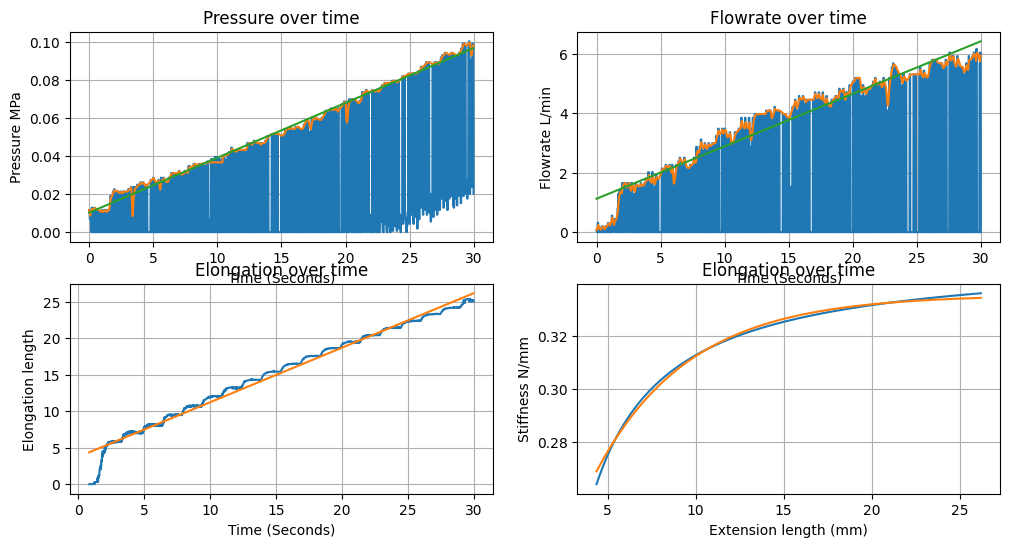

In [29]:

a_p, b_p = linear_fit(time, df["press_clean"].to_numpy())
a_f, b_f = linear_fit(time, df["flow_clean"].to_numpy())
a_disp, b_disp = linear_fit(time[100:], disp[100:].to_numpy())

print(f"Pressure fit:  press_MPA ≈ {a_p:.6f} * t + {b_p:.6f}")
print(f"Flow fit:      flow_Lmin  ≈ {a_f:.6f} * t + {b_f:.6f}")

# Predicted fit lines
press_fit = a_p * time + b_p
flow_fit  = a_f * time + b_f
disp_fit = a_disp*time[100:] + b_disp

D_in = 5  # Diameter of inner section of the bellow (small section)
D_out = 16.5 # Diameter of outer section of the bellow (big section)
Aeff = np.pi * (D_in + D_out)**2/(4*4)
stiffness = press_fit*Aeff/disp_fit

def model_function(x, a, b, c):
    # Example: a quadratic function
    return a * x**2 + b * x + c
def model_saturating_exp(p, k0, a, b):
    # k(p) = k0 + a*(1 - exp(-b*p))
    return k0 + a * (1.0 - np.exp(-b * p))
# popt = second_order_fit(disp_fit.to_numpy(),stiffness[100:].to_numpy(),model_function=model_saturating_exp)
# a_k,b_k,c_k = popt
# # stiffness_fit = a_k * press_fit[100:]**2 + b_k * press_fit[100:] + c_k
# stiffness_fit = model_saturating_exp(disp_fit.to_numpy(),a_k,b_k,c_k)

(popt, pcov, p_fit, k_fit) = fit_saturating_exp(disp_fit.to_numpy(), stiffness[100:].to_numpy())
a_k,b_k,c_k = popt
print(f"Fitting function for stiffness = {a_k} + {b_k} * (1.0 - np.exp(-{c_k} * deltal))")
stiffness_fit = model_saturating_exp(disp_fit.to_numpy(),a_k, b_k, c_k)
# -----------------------------
# Plot
# -----------------------------
fig,axs = plt.subplots(nrows=2,ncols=2, figsize = (12,6))

axs[0][0].plot(time, df["press_MPa"], label="raw pressure")
axs[0][0].plot(time, df["press_clean"], label="clean+smooth pressure")
axs[0][0].plot(time, press_fit, label="linear fit")
axs[0][0].set_xlabel("Time (Seconds)")
axs[0][0].set_ylabel("Pressure MPa")
axs[0][0].set_title("Pressure over time")
axs[0][0].grid(True)

axs[0][1].plot(time, df["flow_Lmin"], label="raw flow")
axs[0][1].plot(time, df["flow_clean"], label="clean+smooth flow")
axs[0][1].plot(time, flow_fit, label="linear fit")
axs[0][1].set_xlabel("Time (Seconds)")
axs[0][1].set_ylabel("Flowrate L/min")
axs[0][1].set_title("Flowrate over time")
axs[0][1].grid(True)

axs[1][0].plot(time[100:], disp[100:], label="raw flow")
axs[1][0].plot(time[100:], disp_fit, label="linear fit")
axs[1][0].set_xlabel("Time (Seconds)")
axs[1][0].set_ylabel("Elongation length")
axs[1][0].set_title("Elongation over time")
axs[1][0].grid(True)

# axs[1][1].plot(press_fit[100:], stiffness[100:], label="Estimated stiffness")
# axs[1][1].plot(press_fit[100:], stiffness_fit, label="fitting stiffness")
axs[1][1].plot(disp_fit, stiffness[100:], label="Estimated stiffness")
axs[1][1].plot(disp_fit, stiffness_fit, label="fitting stiffness")
axs[1][1].set_xlabel("Extension length (mm)")
axs[1][1].set_ylabel("Stiffness N/mm")
axs[1][1].set_title("Elongation over time")
axs[1][1].grid(True)

Pressure w.r.t pwm fit:  press_MPA ≈ 0.004227 * t + 0.012059


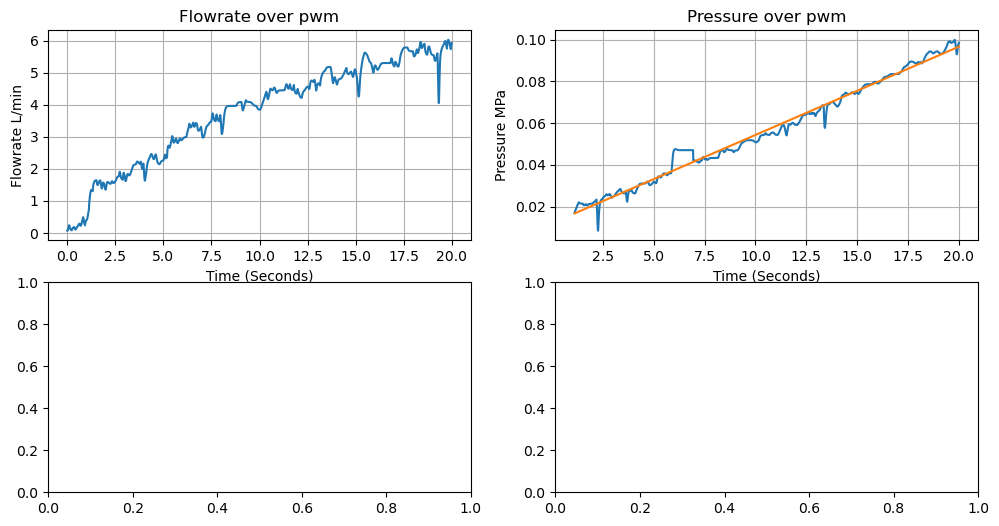

In [9]:
# %matplotlib widget
import matplotlib.pyplot as plt

a_pwm2press, b_pwm2press = linear_fit(act[200:], press_clean[200:].to_numpy())
presswrtpwm_fit = a_pwm2press * act + b_pwm2press
print(f"Pressure w.r.t pwm fit:  press_MPA ≈ {a_pwm2press:.6f} * t + {b_pwm2press:.6f}")
fig,axs = plt.subplots(nrows=2,ncols=2, figsize = (12,6))

axs[0][0].plot(act, flow_clean)
axs[0][0].set_xlabel("Time (Seconds)")
axs[0][0].set_ylabel("Flowrate L/min")
axs[0][0].set_title("Flowrate over pwm")
axs[0][0].grid(True)

axs[0][1].plot(act[200:], press_clean[200:])
axs[0][1].plot(act[200:], presswrtpwm_fit[200:])
axs[0][1].set_xlabel("Time (Seconds)")
axs[0][1].set_ylabel("Pressure MPa")
axs[0][1].set_title("Pressure over pwm")
axs[0][1].grid(True)

In [151]:
from kinematic_modeling import Flow_driven_bellow

model = model = Flow_driven_bellow(
        D_in = 5,
        D_out = 16.5,
        l0=141.5,
        d=1.0,
        lb=0.0,
        lu=0.0,
        k_model= lambda pressure: 0.19855536063825294 + 0.14731629887928976 * (1.0 - np.exp(-32.87721178045016 * pressure)),
        compensated_delta= lambda pressure: pressure * 0 + 0
    )

p = model.val_from_model(model.k_model,0.03)
p

0.29093034455805256

In [8]:
import numpy as np

def Rz(alpha):
    ca, sa = np.cos(alpha), np.sin(alpha)
    return np.array([[ca, -sa, 0.0],
                     [sa,  ca, 0.0],
                     [0.0, 0.0, 1.0]])

R_MW = np.array([[0.0, 0.0, 1.0],
                 [-1.0, 0.0, 0.0],
                 [0.0, -1.0, 0.0]])

def opti_to_manip(pos_W_m, origin_W_m, alpha_rad, scale=1000.0):
    pW = np.array(pos_W_m, dtype=float)
    p0 = np.array(origin_W_m, dtype=float)
    p_rel = pW - p0
    pM = Rz(alpha_rad) @ (R_MW @ p_rel)
    return pM * scale  # into mm if scale=1000

origin_W_m = [0.02619248, 0.28353572, 0.20613328]
origin_W_m[1] += (82 +13.5)/1000.0
alpha_rad = -30*np.pi/180
pos = [0.02819248, 0.22353572, 0.20613328]

transformed_pos = opti_to_manip(pos,origin_W_m,alpha_rad)
origin_W_m

[0.02619248, 0.37903571999999996, 0.20613328]

In [54]:
import time

pairs = []

for k in range(1,25):
    for i in range(1, 27):
        for j in range(i, 27):

            pairs.append([k,i, j])

if [1,3,1] in pairs:
    print('yes')

count = 10
ite = int(len(pairs[0:25])/count)
print(ite)
print(pairs[0:25])
for i in range(0,ite):
    for j in range(count):
        print(pairs[count*i+j])
    print("SLEEPINGGGGGGGGGGGG")
    time.sleep(2)
for j in range(len(pairs[:count*ite]),len(pairs[0:25])):
    print(pairs[j])
    


2
[[1, 1, 1], [1, 1, 2], [1, 1, 3], [1, 1, 4], [1, 1, 5], [1, 1, 6], [1, 1, 7], [1, 1, 8], [1, 1, 9], [1, 1, 10], [1, 1, 11], [1, 1, 12], [1, 1, 13], [1, 1, 14], [1, 1, 15], [1, 1, 16], [1, 1, 17], [1, 1, 18], [1, 1, 19], [1, 1, 20], [1, 1, 21], [1, 1, 22], [1, 1, 23], [1, 1, 24], [1, 1, 25]]
[1, 1, 1]
[1, 1, 2]
[1, 1, 3]
[1, 1, 4]
[1, 1, 5]
[1, 1, 6]
[1, 1, 7]
[1, 1, 8]
[1, 1, 9]
[1, 1, 10]
SLEEPINGGGGGGGGGGGG
[1, 1, 11]
[1, 1, 12]
[1, 1, 13]
[1, 1, 14]
[1, 1, 15]
[1, 1, 16]
[1, 1, 17]
[1, 1, 18]
[1, 1, 19]
[1, 1, 20]
SLEEPINGGGGGGGGGGGG
[1, 1, 21]
[1, 1, 22]
[1, 1, 23]
[1, 1, 24]
[1, 1, 25]
